<a href="https://colab.research.google.com/github/VegaSera/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2/Wesley_Mountford_LS_DS12_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-21 20:29:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-01-21 20:29:24 (592 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import scipy.stats as stats
import pandas as pd
import numpy as np

In [0]:
def confidence_interval(data, confidence=0.95): #Standard confidence interval function from the lecture
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)

  s = np.std(data, ddof=1) 
  std_err = s / np.sqrt(n) 
  margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2.0, n - 1) 
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [4]:
column_headers = ['party', 'handicapped-infants', 'water-project', 'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 'synfuels','educations', 'right-to-sue', 'crime', 'duty-free', 'south-africa']
df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?') #Getting all of our previous cleaning operations out of the way quickly.
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,educations,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = (df[df['party'] == 'democrat'])#Setting up our individual dataframes for dems and reps
rep = (df[df['party'] == 'republican'])

In [0]:
dem_list = [] #List of tuples from the confidence intervals
rep_list = []

for col in dem.columns[1:]: #Getting confidence intervals for democrats issues
  dem_list.append(confidence_interval(dem[col].dropna()))

for col in rep.columns[1:]: #Getting confidence intervals for republican issues
  rep_list.append(confidence_interval(rep[col].dropna()))

dem_mean = [] #List of mean values for democrats
dem_dev = [] #List of deviations for democrats, for error bars

for i in dem_list:
  dem_mean.append(i[0])
  dem_dev.append(i[0] - i[1]) #Mean - minimum gives us our error.

rep_mean = [] #Same as for Dems
rep_dev = []

for i in rep_list:
  rep_mean.append(i[0])
  rep_dev.append(i[0] - i[1])

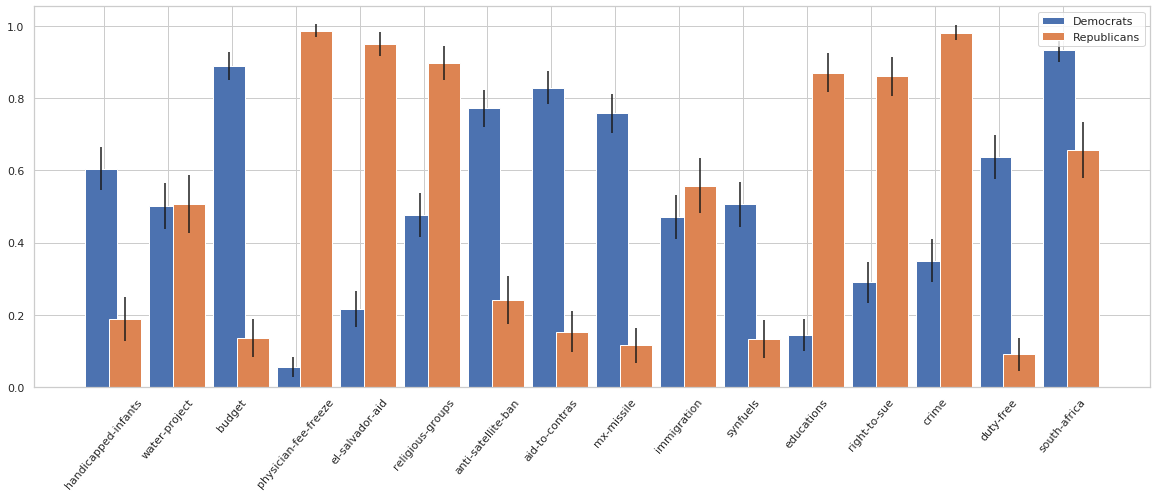

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[20, 7])

ind = np.arange(len(column_headers) - 1)
width = 0.5
p1 = ax.bar(ind, dem_mean, width, yerr=dem_dev)
p2 = ax.bar(ind + (width*0.75), rep_mean, width, yerr=rep_dev)
ax.set_xticks(ind + width/10)
ax.set_xticklabels(column_headers[1:], rotation=50)

ax.legend((p1[0], p2[0]), ('Democrats', 'Republicans'))
plt.show()


What I interpret from the graph above is that only two bills really have any hope of swinging either way with a different sample of democrats/republicans, that being Immigration and the Water Project.

#Chi-squared tests

In [157]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data


--2020-01-22 02:23:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data’

car.data            100%[===================>]  50.65K  --.-KB/s    in 0.06s   

2020-01-22 02:23:11 (825 KB/s) - ‘car.data’ saved [51867/51867]



In [162]:
car_header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df2 = pd.read_csv('car.data', names=car_header)
df2.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [173]:
ct = pd.crosstab(df2['safety'], df2['class']) #Comparing car safety and overall car acceptability
ct

class,acc,good,unacc,vgood
safety,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


In [251]:
c_array = np.array(ct) #Setting our original array
col_totals = []#Setting empty lists to be added to.
row_totals = []
for i in range(len(c_array[0])): #Tallying up the totals of each column.
  col_totals.append(c_array[0][i] + c_array[1][i] + c_array[2][i]) #This code wont work for any shape array, only the one we're specifically testing here.

for i in range(len(c_array)): #And the totals of each row.
  row_totals.append(c_array[i].sum())

n_array = np.array([[0,0,0,0], [0,0,0,0], [0,0,0,0]], dtype=float) 
for row in range(len(c_array)): #this pair of for loops is to gain our expected values.
  for col in range(len(c_array[0])): 
    n_array[row, col] = (col_totals[col] * (row_totals[row] / sum(row_totals)))

for row in range(len(c_array)): #this pair of for loops is to gain our final cell value, to be added into our test statistic
  for col in range(len(c_array[0])): 
    n_array[row, col] = (((c_array[row][col] - n_array[row][col]) ** 2) / n_array[row][col])
  

test_stat = {sum(n_array[0]) + sum(n_array[1]) + sum(n_array[2])} #Sums the final array to get our test statistic.
dof = ((len(c_array) - 1) * (len(c_array[0]) - 1)) #Table length-1 times width-1 is our degrees of freedom.
test_stat = test_stat.pop() #Test statistic is in a set on its own, popping it out of that set.
print(f'Test statistic = {test_stat}')
print(f'Degrees of freedom = {dof}')
print(f"P-value - {stats.chi2.pdf(np.abs(test_stat), dof)*2}")

Test statistic = 479.32243981315133
Degrees of freedom = 6
P-value - 2.369300815493576e-100


In [174]:
stats.chi2_contingency(ct) #I prefer this one. I want to do it this way from now on.

(479.3224398131512,
 2.389155399044034e-100,
 6,
 array([[128.        ,  23.        , 403.33333333,  21.66666667],
        [128.        ,  23.        , 403.33333333,  21.66666667],
        [128.        ,  23.        , 403.33333333,  21.66666667]]))

In [0]:
#For both the written out and the quick scipy way, I got the same test statistic, degrees of freedom, and similar enough p_values within the floating point errors.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)